<a href="https://colab.research.google.com/github/VictorTome/Advanced-Machine-Learning-Credit-Card-Churn-Prediction/blob/main/Hive_SQL_Yellow_Taxi_Trip_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
import pandas as pd
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
taxi = pd.read_csv('/content/drive/MyDrive/yellow_tripdata_2015-01-06.csv')


In [ ]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,trip_time
0,2,2015-01-08 22:44:09,2015-01-08 22:50:56,1,1.55,-73.987686,40.724251,1,N,-73.973763,40.743378,2,7.5,0.5,0.5,0.0,0.0,8.8,5000
1,1,2015-01-08 22:44:09,2015-01-08 22:51:17,3,1.20,-73.991570,40.726933,1,N,-74.004105,40.721081,2,7.0,0.5,0.5,0.0,0.0,8.3,5344860
2,1,2015-01-08 22:44:10,2015-01-08 22:55:27,1,2.40,-73.981918,40.783443,1,N,-73.952354,40.798199,2,10.5,0.5,0.5,0.0,0.0,11.8,3345464
3,1,2015-01-08 22:44:10,2015-01-08 22:58:09,1,7.30,-73.973122,40.743553,1,N,-73.919571,40.832001,2,21.5,0.5,0.5,0.0,0.0,22.8,893933
4,1,2015-01-08 22:44:12,2015-01-08 22:46:16,1,0.40,-73.982948,40.766209,1,N,-73.984390,40.764053,2,3.5,0.5,0.5,0.0,0.0,4.8,36864


In [ ]:
total_trips = len(taxi)
print("Total number of trips:", total_trips)


Total number of trips: 10000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               10000 non-null  int64  
 1   tpep_pickup_datetime   10000 non-null  object 
 2   tpep_dropoff_datetime  10000 non-null  object 
 3   passenger_count        10000 non-null  int64  
 4   trip_distance          10000 non-null  float64
 5   pickup_longitude       10000 non-null  float64
 6   pickup_latitude        10000 non-null  float64
 7   RateCodeID             10000 non-null  int64  
 8   store_and_fwd_flag     10000 non-null  object 
 9   dropoff_longitude      10000 non-null  float64
 10  dropoff_latitude       10000 non-null  float64
 11  payment_type           10000 non-null  int64  
 12  fare_amount            10000 non-null  float64
 13  extra                  10000 non-null  float64
 14  mta_tax                10000 non-null  float64
 15  tip

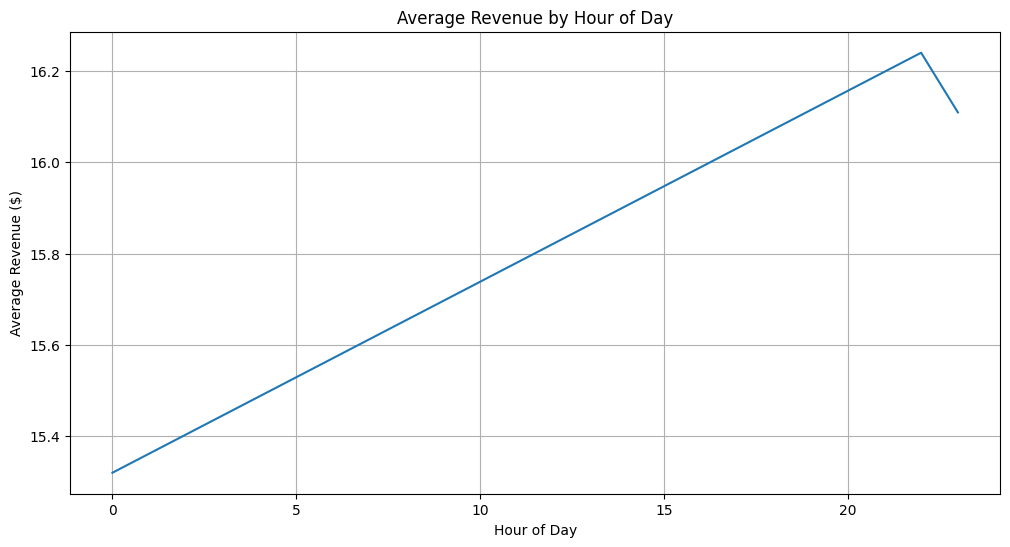

In [ ]:
# Yellow Taxi Trip Analysis using Pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/yellow_tripdata_2015-01-06.csv'
taxi = pd.read_csv(file_path)

# Display basic info
taxi.info()

# Convert datetime columns to datetime
# Check the actual column name in your CSV file for pickup and dropoff times.
# It's likely 'tpep_pickup_datetime' and 'tpep_dropoff_datetime'
taxi['pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'])  # Changed column name here
taxi['dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime']) # Changed column name here


# Q1: What is the total revenue generated by all trips?
total_revenue = taxi['total_amount'].sum()
print(f"1. Total revenue: ${total_revenue:,.2f}")

# Q2: What fraction of the total is paid for tolls?
total_tolls = taxi['tolls_amount'].sum()
toll_fraction = total_tolls / total_revenue
print(f"2. Fraction paid as tolls: {toll_fraction:.2%}")

# Q3: What fraction of the total is the drivers tips?
total_tips = taxi['tip_amount'].sum()
tip_fraction = total_tips / total_revenue
print(f"3. Fraction paid as tips: {tip_fraction:.2%}")

# Q4: What is the average trip amount?
avg_trip_amount = taxi['total_amount'].mean()
print(f"4. Average trip amount: ${avg_trip_amount:.2f}")

# Q5: What is the average distance of the trips?
avg_distance = taxi['trip_distance'].mean()
print(f"5. Average trip distance: {avg_distance:.2f} miles")

# Q6: How many payment types are used?
payment_types_count = taxi['payment_type'].nunique()
print(f"6. Number of unique payment types: {payment_types_count}")

# Q7: For each payment type, describe:
payment_summary = taxi.groupby('payment_type')[['fare_amount', 'tip_amount', 'mta_tax']].mean()
print("\n7. Payment type summary (average values):")
print(payment_summary)

# Q8: On average, which hour of the day generates the highest revenue?
taxi['hour'] = taxi['pickup_datetime'].dt.hour
revenue_by_hour = taxi.groupby('hour')['total_amount'].mean() # Changed df to taxi
peak_hour = revenue_by_hour.idxmax()
peak_hour_revenue = revenue_by_hour.max()
print(f"\n8. Hour with highest average revenue: {peak_hour}:00 with ${peak_hour_revenue:.2f} per trip")

# (Optional) Plotting Revenue by Hour
plt.figure(figsize=(12,6))
sns.lineplot(x=revenue_by_hour.index, y=revenue_by_hour.values)
plt.title('Average Revenue by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Revenue ($)')
plt.grid(True)
plt.show()

In [ ]:
payment_summary = taxi.groupby('payment_type')[['fare_amount', 'tip_amount', 'mta_tax']].mean()
print("\n7. Payment type summary (average values):")
# Format the table for better readability
formatted_summary = payment_summary.style.format("${:,.2f}") # Format to currency
display(formatted_summary) # Display as a formatted table


7. Payment type summary (average values):


,fare_amount,tip_amount,mta_tax
payment_type,,,
1,$13.56,$2.70,$0.50
2,$11.39,$0.00,$0.50
3,$13.21,$0.00,$0.42
4,$12.22,$0.00,$0.50
